<a href="https://colab.research.google.com/github/YoooonaLee/machine_learning/blob/main/SVM__%EC%95%84%EC%9D%B4%EB%A6%AC%EC%8A%A4_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D


## CÍ∞íÏùÑ Ï°∞Ï†ïÌï¥ÏÑú hard marginÏùºÎïåÏôÄ soft marginÏùº Îïå ÎπÑÍµê

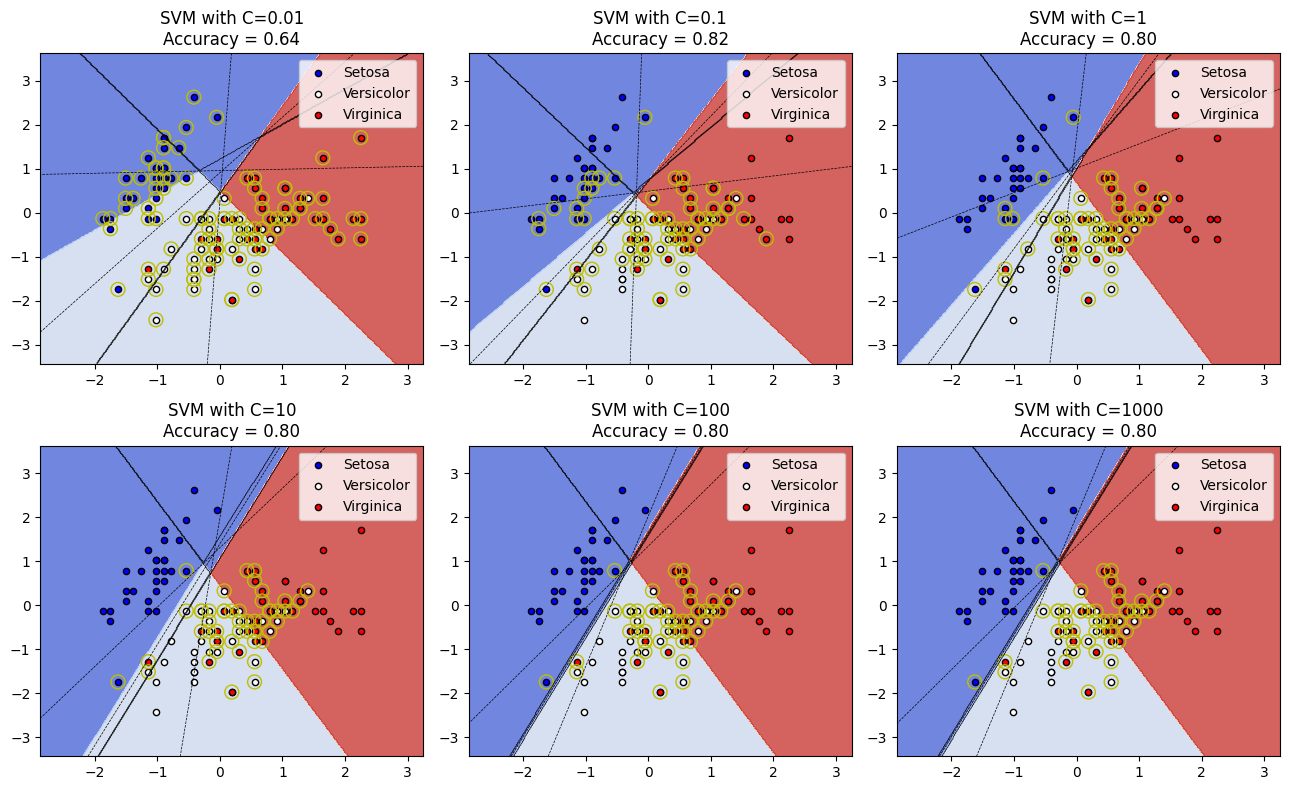

In [ ]:

from sklearn.svm import SVC

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï§ÄÎπÑ
iris = datasets.load_iris()
X = iris.data[:, :2]  # Ï≤´ Îëê Í∞úÏùò ÌîºÏ≤ò ÏÇ¨Ïö©
y = iris.target

# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# C Í∞í Î∞∞Ïó¥ ÏÑ§Ï†ï
C_values = [0.01, 0.1, 1, 10, 100, 1000] #‚≠ê
rows = (len(C_values) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(13, rows * 4))

# ÏÑúÎ∏åÌîåÎ°Ø ÌèâÌÉÑÌôî
axes = axes.ravel()

# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉâÏÉÅ Ï†ïÏùò
class_names = ['Setosa', 'Versicolor', 'Virginica']
colors = ['b', 'w', 'r']

for i, C in enumerate(C_values):
    # SVM Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌõàÎ†® (OvR Î∞©Ïãù ÏÇ¨Ïö©)
    model = SVC(kernel='linear', C=C, decision_function_shape='ovr') #‚≠ê svcÎ™®Îç∏ ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú ovrÎ∞©ÏãùÏúºÎ°ú ÌÅ¥ÎûòÏä§Î•º ÏÑ†ÌÉùÌï¥Ï£ºÎäî Î°úÏßÅÏù¥ ÏûàÏùå.
    model.fit(X_train, y_train)

    # Í≤∞Ï†ï Í≤ΩÍ≥Ñ Í∑∏Î¶¨Í∏∞
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

    # Í∞Å Ìè¨Ïù∏Ìä∏Ïóê ÎåÄÌïú ÌÅ¥ÎûòÏä§ ÏòàÏ∏° (OvR Î∞©ÏãùÏóêÏÑú ÏµúÏ¢Ö ÌÅ¥ÎûòÏä§ ÏÑ†ÌÉù)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #‚≠ê
    Z = Z.reshape(xx.shape)

    # ÏãúÍ∞ÅÌôî
    ax = axes[i]
    # Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏãúÍ∞ÅÌôî
    contour = ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Í∞Å ÌÅ¥ÎûòÏä§Ïùò Í≤∞Ï†ï Ìï®Ïàò Í≥ÑÏÇ∞ ÌõÑ ÎßàÏßÑ ÏãúÍ∞ÅÌôî #‚≠ê
    if model.decision_function(np.c_[xx.ravel(), yy.ravel()]).ndim > 1:
        for j in range(model.decision_function(np.c_[xx.ravel(), yy.ravel()]).shape[1]): #shape[1]ÏùÄ ÌÅ¥ÎûòÏä§Ïùò Ïàò
            Z_margin = model.decision_function(np.c_[xx.ravel(), yy.ravel()])[:, j].reshape(xx.shape)
            ax.contour(xx, yy, Z_margin, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k', linewidths=0.5) #‚≠ê0ÌÅ¥ÎûòÏä§Í∞Ä Ïã§Ï†ú Í≤∞Ï†ïÍ≤ΩÍ≥Ñ -1,1ÏùÄ ÎßàÏßÑÍ≤ΩÍ≥Ñ
    else:
        Z_margin = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax.contour(xx, yy, Z_margin, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k', linewidths=0.5)

    # ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î∞è ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
    for j, color in zip(np.unique(y_train), colors):
        ax.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c=color, edgecolors='k', s=20, label=class_names[j])

    # Î≤îÎ°Ä Ï∂îÍ∞Ä
    ax.legend()

    ax.set_title(f'SVM with C={C}\nAccuracy = {accuracy_score(y_test, model.predict(X_test)):.2f}')

    # ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ ÌëúÏãú
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='y')

plt.tight_layout()
plt.show()


##üìë Í≤∞Íµ≠ ÏïÑÎ¨¥Î¶¨ Ïûò Î∂ÑÎ•òÌï¥ÎèÑ? 2Ï∞®ÏõêÏÉÅÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†ÌòïÎ∂ÑÎ•òÌïòÎäî Í≤ÉÏùÄ ÌïúÍ≥ÑÍ∞Ä ÏûàÏùå. ÌäπÌûà Îπ®Í∞ïÏÉâ Ìù∞ÏÉâ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏ÌÑ∞Îì§..
##=> Ïª§ÎÑêÍ∞úÎÖê ÎèÑÏûÖ


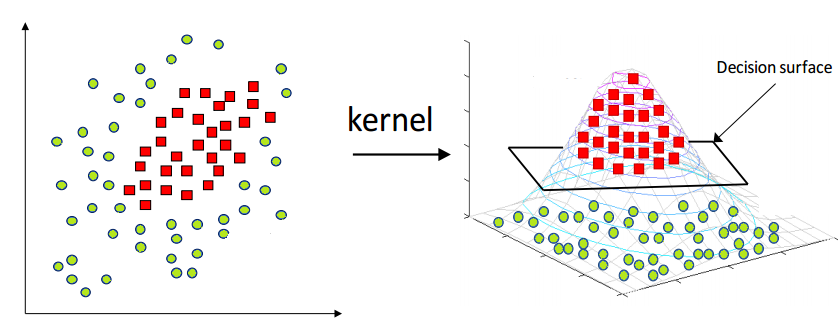

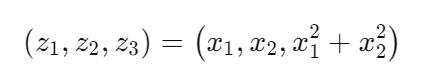



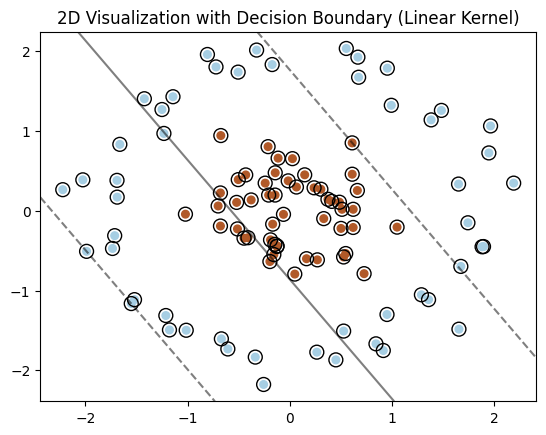

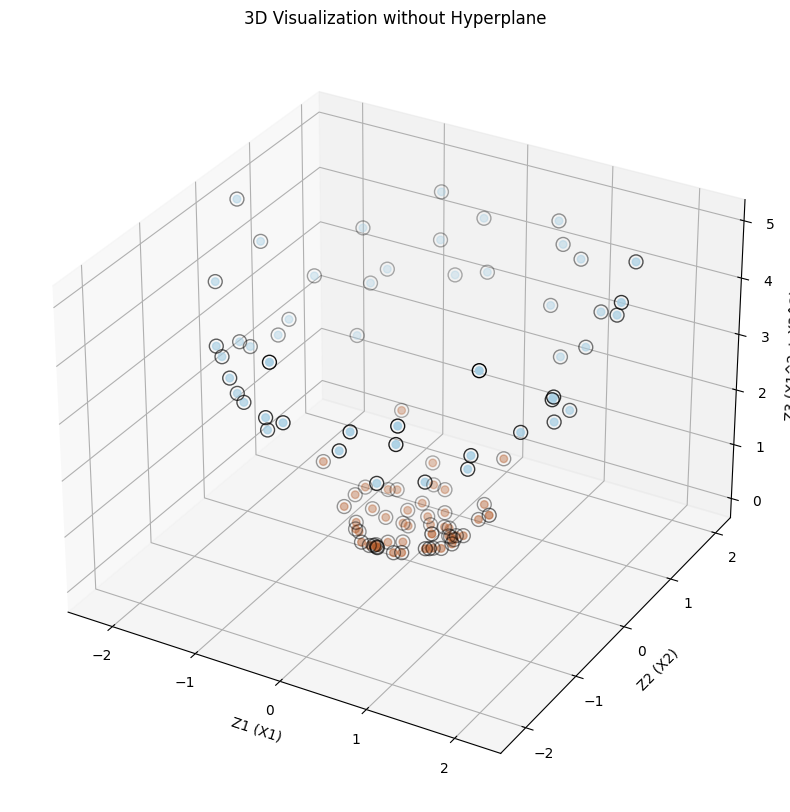

In [ ]:


#  ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±
X, y = datasets.make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42) #factorÎäî Îëê ÏõêÏÇ¨Ïù¥Í∞ÑÍ≤© Ï°∞Ï†à

#  Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  SVM Î™®Îç∏ Ï†ïÏùò (ÏÑ†Ìòï Ïª§ÎÑê ÏÇ¨Ïö©)
svm_linear = SVC(kernel='linear', C=1)  # ÏÑ†Ìòï Ïª§ÎÑê ÏÇ¨Ïö©
svm_linear.fit(X_scaled, y)

#  2Ï∞®Ïõê ÏãúÍ∞ÅÌôî (Ïª§ÎÑêÏùÑ ÌÜµÌïú Í≤∞Ï†ï Í≤ΩÍ≥Ñ Î∞òÏòÅ)
def plot_svc_decision_boundary(svm, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Î©îÏâ¨ Í∑∏Î¶¨Îìú ÏÉùÏÑ±
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))

    # Í≤∞Ï†ï Í≤ΩÍ≥Ñ Í∑∏Î¶¨Í∏∞
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Í≤∞Ï†ï Í≤ΩÍ≥Ñ Î∞è ÎßàÏßÑ Í≤ΩÍ≥Ñ ÌëúÏãú
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ ÌëúÏãú
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, #‚≠ê
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

#  2Ï∞®Ïõê Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏãúÍ∞ÅÌôî
plot_svc_decision_boundary(svm_linear, X_scaled, y, "2D Visualization with Decision Boundary (Linear Kernel)")

#  Ïª§ÎÑê Î≥ÄÌôò: z3 = x1^2 + x2^2
Z1 = X_scaled[:, 0]
Z2 = X_scaled[:, 1]
Z3 = Z1**2 + Z2**2

#  3D ÏãúÍ∞ÅÌôî (ÌèâÎ©¥ ÏóÜÏù¥ ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞Îßå ÌëúÏãú)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ ÌëúÏãú
ax.scatter(Z1, Z2, Z3, c=y, cmap=plt.cm.Paired, s=30)

# ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Í∞ïÏ°∞ ÌëúÏãú
ax.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1],
           svm_linear.support_vectors_[:, 0]**2 + svm_linear.support_vectors_[:, 1]**2,
           s=100, facecolors='none', edgecolors='k')

# Ï∂ï Î∞è Ï†úÎ™© ÏÑ§Ï†ï
ax.set_xlabel('Z1 (X1)')
ax.set_ylabel('Z2 (X2)')
ax.set_zlabel('Z3 (X1^2 + X2^2)')
ax.set_title("3D Visualization without Hyperplane")

plt.show()


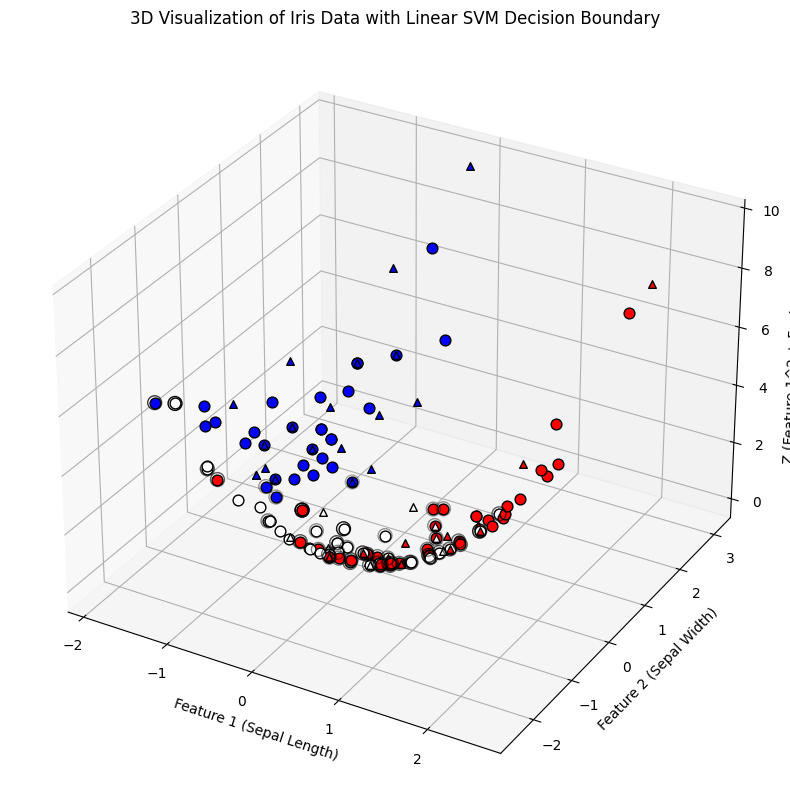

In [ ]:

# Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
iris = datasets.load_iris()
X = iris.data[:, :2]  # Ï≤òÏùå Îëê ÌäπÏÑ±Îßå ÏÇ¨Ïö© (Sepal Length, Sepal Width)
y = iris.target

# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Í≥†Ï∞®Ïõê Î≥ÄÌôò: Z = X1^2 + X2^2
Z1_train = X_train[:, 0]
Z2_train = X_train[:, 1]
Z3_train = Z1_train**2 + Z2_train**2  # ÎπÑÏÑ†Ìòï ÌäπÏÑ± Ï∂îÍ∞Ä

Z1_test = X_test[:, 0]
Z2_test = X_test[:, 1]
Z3_test = Z1_test**2 + Z2_test**2  # ÎπÑÏÑ†Ìòï ÌäπÏÑ± Ï∂îÍ∞Ä

# ÏÑ†Ìòï SVM Î™®Îç∏ Ï†ïÏùò (Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©)
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(np.c_[Z1_train, Z2_train, Z3_train], y_train)  # Î≥ÄÌôòÎêú Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†®

# 3D ÏãúÍ∞ÅÌôî
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
colors = {0: 'blue', 1: 'white', 2: 'red'}
for i in range(len(Z1_train)):
    ax.scatter(Z1_train[i], Z2_train[i], Z3_train[i], color=colors[y_train[i]], s=60, edgecolor='k')

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî (ÌÅ¨Í∏∞Î•º Ï§ÑÏó¨ÏÑú ÌëúÏãú)
for i in range(len(Z1_test)):
    ax.scatter(Z1_test[i], Z2_test[i], Z3_test[i], color=colors[y_test[i]], s=30, edgecolor='k', marker='^')

# ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Í∞ïÏ°∞
ax.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1],
           svm_linear.support_vectors_[:, 0]**2 + svm_linear.support_vectors_[:, 1]**2,
           s=100, facecolors='none', edgecolors='k')

# Ï∂ï ÏÑ§Ï†ï
ax.set_xlabel('Feature 1 (Sepal Length)')
ax.set_ylabel('Feature 2 (Sepal Width)')
ax.set_zlabel('Z (Feature 1^2 + Feature 2^2)')
ax.set_title("3D Visualization of Iris Data with Linear SVM Decision Boundary")

plt.show()


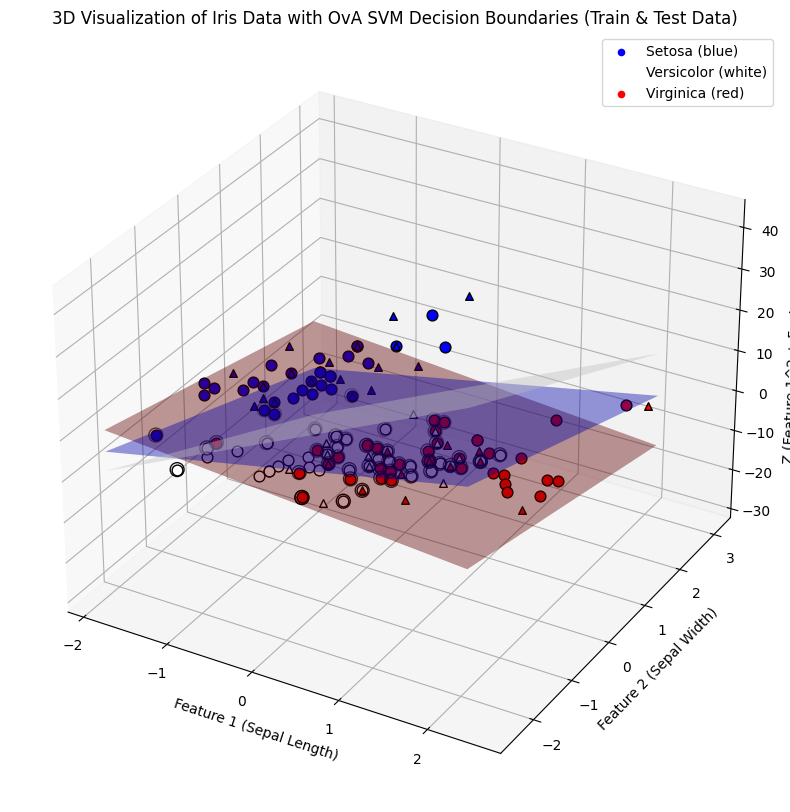

In [ ]:
# One-vs-All SVM Î™®Îç∏ Ï†ïÏùò (ÏÑ†Ìòï Ïª§ÎÑê ÏÇ¨Ïö©)
svm_ova = SVC(kernel='linear', C=1, decision_function_shape='ovr') #
svm_ova.fit(np.c_[Z1_train, Z2_train, Z3_train], y_train)  # Í≥†Ï∞®Ïõê Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†®

# 3D ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉâÏÉÅ Î∞è ÍΩÉ Ïù¥Î¶Ñ Ï†ïÏùò
colors = {0: 'blue', 1: 'white', 2: 'red'}
class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
for i in range(len(Z1_train)):
    ax.scatter(Z1_train[i], Z2_train[i], Z3_train[i], color=colors[y_train[i]], s=60, edgecolor='k')

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî (ÏûëÏùÄ ÌÅ¨Í∏∞Î°ú ÌëúÏãú)
for i in range(len(Z1_test)):
    ax.scatter(Z1_test[i], Z2_test[i], Z3_test[i], color=colors[y_test[i]], s=30, edgecolor='k', marker='^')

# Î©îÏâ¨ Í∑∏Î¶¨Îìú ÏÉùÏÑ±
xx, yy = np.meshgrid(np.linspace(Z1_train.min(), Z1_train.max(), 50),
                     np.linspace(Z2_train.min(), Z2_train.max(), 50))

# Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Í≤∞Ï†ï Í≤ΩÍ≥Ñ Í∑∏Î¶¨Í∏∞
for i in range(3):  # ÌÅ¥ÎûòÏä§Í∞Ä 3Í∞úÏùº Îïå
    # Í≤∞Ï†ï Í≤ΩÍ≥Ñ Í≥ÑÏÇ∞ (iÎ≤àÏß∏ ÌÅ¥ÎûòÏä§ vs ÎÇòÎ®∏ÏßÄ)
    zz = -(svm_ova.coef_[i, 0] * xx + svm_ova.coef_[i, 1] * yy + svm_ova.intercept_[i]) / svm_ova.coef_[i, 2]

    # Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Í≤ΩÍ≥ÑÎ©¥ÏùÑ Ìï¥Îãπ ÌÅ¥ÎûòÏä§ ÏÉâÏÉÅÏúºÎ°ú Í∑∏Î¶¨Í∏∞
    ax.plot_surface(xx, yy, zz, alpha=0.4, color=colors[i], rstride=100, cstride=100)

# ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Í∞ïÏ°∞
ax.scatter(svm_ova.support_vectors_[:, 0], svm_ova.support_vectors_[:, 1],
           svm_ova.support_vectors_[:, 0]**2 + svm_ova.support_vectors_[:, 1]**2,
           s=100, facecolors='none', edgecolors='k')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
for class_label, color in colors.items():
    ax.scatter([], [], color=color, label=f'{class_names[class_label]} ({color})')

ax.legend()

# Ï∂ï ÏÑ§Ï†ï
ax.set_xlabel('Feature 1 (Sepal Length)')
ax.set_ylabel('Feature 2 (Sepal Width)')
ax.set_zlabel('Z (Feature 1^2 + Feature 2^2)')
ax.set_title("3D Visualization of Iris Data with OvA SVM Decision Boundaries (Train & Test Data)")

plt.show()


In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
y_pred = svm_ova.predict(np.c_[Z1_test, Z2_test, Z3_test])

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, y_pred)

# ÏòàÏ∏° Í≤∞Í≥ºÏôÄ Ïã§Ï†ú Í∞íÏùÑ Ïó¥Î°ú ÎÇòÎûÄÌûà Ï∂úÎ†•
print("Actual vs Predicted Labels:")
print("Actual\tPredicted")
for actual, predicted in zip(y_test, y_pred):
    print(f"{actual}\t{predicted}")

# Ï†ïÌôïÎèÑ Ï∂úÎ†•
print(f"\nAccuracy score: {accuracy:.2f}")


Actual vs Predicted Labels:
Actual	Predicted
1	1
0	0
2	2
1	1
1	2
0	0
1	1
2	2
1	1
1	1
2	2
0	0
0	0
0	0
0	0
1	2
2	2
1	1
1	1
2	1
0	0
2	1
0	0
2	1
2	2
2	2
2	1
2	2
0	0
0	0
0	0
0	0
1	2
0	0
0	0
2	1
1	2
0	0
0	0
0	0
2	1
1	2
1	2
0	0
0	0

Accuracy score: 0.73


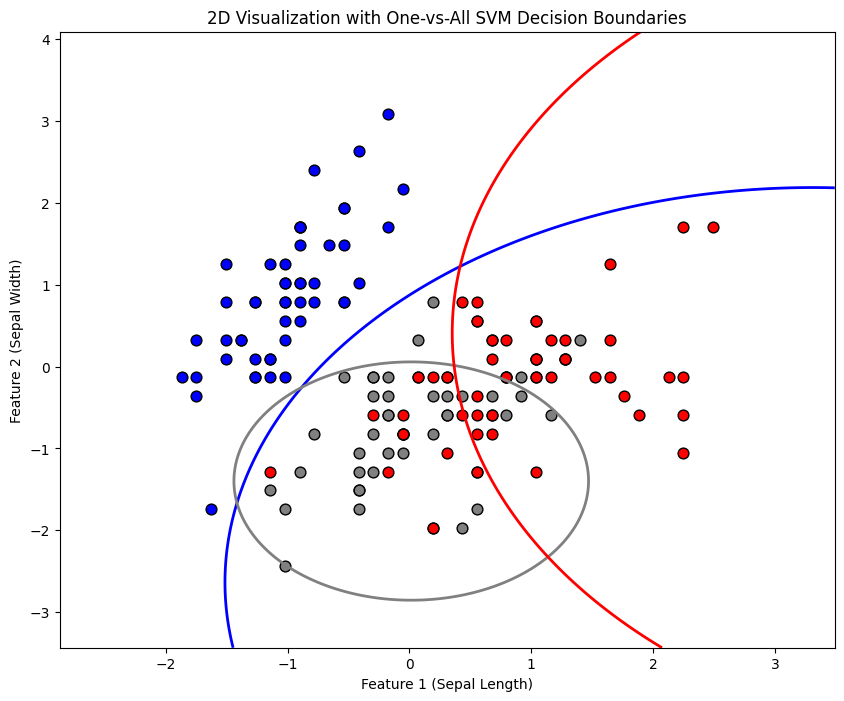

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
iris = datasets.load_iris()
X = iris.data[:, :2]  # Ï≤òÏùå Îëê ÌäπÏÑ±Îßå ÏÇ¨Ïö© (Sepal Length, Sepal Width)
y = iris.target

# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Í≥†Ï∞®Ïõê Î≥ÄÌôò: Z = X1^2 + X2^2
Z1 = X_scaled[:, 0]
Z2 = X_scaled[:, 1]
Z3 = Z1**2 + Z2**2  # ÎπÑÏÑ†Ìòï ÌäπÏÑ± Ï∂îÍ∞Ä

# 2D ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú One-vs-All SVM Î™®Îç∏ÏùÑ Í∞ÅÍ∞ÅÏùò ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ ÌõàÎ†®
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ï§ÄÎπÑ
fig, ax = plt.subplots(figsize=(10, 8))



colors = {0: 'blue', 1: 'grey', 2: 'red'}
for i in range(len(X_scaled)):
    plt.scatter(X_scaled[i, 0], X_scaled[i, 1], color=colors[y[i]], s=60, edgecolor='k')

# Í∞Å ÌÅ¥ÎûòÏä§Î•º Í∏∞Ï§ÄÏúºÎ°ú One-vs-All Î™®Îç∏ ÌõàÎ†® Î∞è Í≤∞Ï†ï Í≤ΩÍ≥Ñ Í∑∏Î¶¨Í∏∞
for i in range(3):
    # Í∞Å ÌÅ¥ÎûòÏä§Î•º Í∏∞Ï§ÄÏúºÎ°ú One-vs-All ÌÉÄÍ≤ü ÏÑ§Ï†ï
    y_one_vs_all = np.where(y == i, 1, 0)

    # ÏÑ†Ìòï SVM Î™®Îç∏ Ï†ïÏùò
    svm_ova = SVC(kernel='linear', C=1)
    svm_ova.fit(np.c_[Z1, Z2, Z3], y_one_vs_all)

    # 2D Í≥µÍ∞ÑÏóêÏÑú Í≤∞Ï†ï Ìï®Ïàò Í≥ÑÏÇ∞
    Z = svm_ova.decision_function(np.c_[xx.ravel(), yy.ravel(), (xx.ravel() ** 2 + yy.ravel() ** 2)])
    Z = Z.reshape(xx.shape)

    # Í≤∞Ï†ï Í≤ΩÍ≥Ñ Í∑∏Î¶¨Í∏∞
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors=colors[i])

# Ï∂ï Î∞è Ï†úÎ™© ÏÑ§Ï†ï
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.title('2D Visualization with One-vs-All SVM Decision Boundaries')
plt.show()


